<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" height=300 width=300 />


# Final Project: League of Legends Match Predictor 


# League of Legends Match Predictor

## Introduction

League of Legends is a highly popular multiplayer online battle arena (MOBA) game that generates extensive match data. This data provides a great opportunity to apply machine learning techniques to real-world scenarios, specifically in predicting match outcomes.

In this project, I developed a logistic regression model to analyze historical match data and predict the likelihood of a win. By leveraging data preprocessing techniques, feature scaling, and machine learning algorithms, I built a model that identifies key patterns influencing match results. The dataset, `league_of_legends_data_large.csv`, serves as the foundation for this analysis.

## Data Loading and Preprocessing

To ensure the dataset is structured optimally for training, I followed these preprocessing steps:

1. **Loading the dataset**: I used `pandas` to read the dataset into a DataFrame.
2. **Feature and target separation**: The target variable (`win`) was extracted, and the remaining columns were retained as input features.
3. **Splitting the data**: I divided the dataset into training (80%) and testing (20%) sets using `train_test_split` from `sklearn.model_selection`, ensuring reproducibility with `random_state=42`.
4. **Feature scaling**: I standardized the features using `StandardScaler` from `sklearn.preprocessing` to normalize input values.
5. **Converting to PyTorch tensors**: Finally, I transformed the dataset into PyTorch tensors using `torch.tensor()` to prepare it for model training.


### Setup
Installing required libraries:

The following required libraries are not pre-installed in the Skills Network Labs environment, so I need to run the following cell to install them:


In [ ]:
import os

# Changed to a stable directory (adjust if needed)
os.chdir('/home')  # Used '/root' or '/home/jovyan' as I am in a cloud environment: JupyterHub

# Installed required libraries (remove --user to install in the current environment)
!pip install pandas
!pip install scikit-learn
!pip install torch
!pip install matplotlib

# Verified installations
import pandas as pd
import sklearn
import torch
import matplotlib

# Printed versions to confirm successful installation
print("Libraries installed successfully!")
print("pandas version:", pd.__version__)
print("scikit-learn version:", sklearn.__version__)
print("torch version:", torch.__version__)  # This should now work
print("matplotlib version:", matplotlib.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 109.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 170.9 MB/s eta 0:00:00


In [37]:
# Import Required Libraries
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from torch.utils.data import DataLoader, TensorDataset



#Load the data
filepath = ('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/'
            'rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv')

data = pd.read_csv(filepath)

#Split the data into Target and features
X = data.drop('win', axis=1)  # Features (all columns except 'win')
y = data['win'] # Target 'y', only win column ('0' or '1' for binary classification)

#Split the data into Training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardize features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Convert data into tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)

## Logistic Regression Model  

To build a predictive model for League of Legends match outcomes, I implemented a logistic regression model using PyTorch. This model takes match features as input and predicts the probability of a win using a sigmoid activation function.  

### Model Definition  

1. **Define the Logistic Regression Model**  
   - I created a class `LogisticRegressionModel` that inherits from `torch.nn.Module`.  
   - The model consists of a single linear layer (`nn.Linear`) to map input features to an output probability.  
   - The `forward()` method applies a **sigmoid activation function** to the output to ensure values range between 0 and 1.  

2. **Initialize the Model, Loss Function, and Optimizer**  
   - **Input dimensions**: The number of input features is dynamically set using `X_train.shape[1]`.  
   - **Model initialization**: An instance of `LogisticRegressionModel` is created with the specified input dimension.  
   - **Loss function**: I used **Binary Cross-Entropy Loss (BCELoss)** since this is a binary classification task.  
   - **Optimizer**: I initialized **Stochastic Gradient Descent (SGD)** with a learning rate of **0.01** for model optimization.  

With this setup, the model is ready for training.


In [38]:
n_inputs = X_train.shape[1]

class LogisticRegressionModel(nn.Module):

    #build the constructor
    def __init__(self, n_inputs):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(n_inputs, 1)

    #define/ make the Prediction
    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x))
        
        return yhat

model = LogisticRegressionModel(n_inputs)

criterion = nn.BCELoss()

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.99)


## Model Training  

With the logistic regression model defined, I now train it using the dataset. The training process involves multiple epochs where the model learns to minimize loss and improve predictions.  

### Training Process  

1. **Set the Number of Epochs**  
   - The model is trained for **1000 epochs** to ensure convergence.  

2. **Training Loop** (For each epoch):  
   - Set the model to **training mode** using `model.train()`.  
   - **Zero gradients** before each update using `optimizer.zero_grad()`.  
   - **Forward pass**: Pass `X_train_tensor` through the model to generate predictions.  
   - **Compute the loss** using **Binary Cross-Entropy Loss (BCELoss)**.  
   - **Backpropagation**: Compute gradients with `loss.backward()`.  
   - **Update model parameters** using `optimizer.step()`.  

3. **Print Loss Every 100 Epochs**  
   - To monitor training progress, I print the **epoch number and loss value** every 100 epochs.  

### Model Evaluation  

1. **Switch to Evaluation Mode**  
   - The model is set to **evaluation mode** with `model.eval()`.  
   - `torch.no_grad()` is used to disable gradient calculations during evaluation.  

2. **Generate Predictions**  
   - Compute predictions for both the **training set (`X_train_tensor`)** and **test set (`X_test_tensor`)**.  

3. **Calculate Accuracy**  
   - Convert predictions to binary values using a **threshold of 0.5**.  
   - Compare predicted labels with true labels (`y_train_tensor`, `y_test_tensor`).  
   - Compute and print **training and test accuracy**.  


In [7]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
url = ('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud'
'/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv')

data = pd.read_csv(url)

# Features and target
X = data.drop('win', axis=1).values
y = data['win'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test)

# Define a true logistic regression model (single linear layer)
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)  # Single linear layer: input_size -> 1
        self.sigmoid = nn.Sigmoid()  # Sigmoid activation for probabilities

    def forward(self, x):
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

# Initialize model, loss, and optimizer (no L2 regularization for Step 3)
input_size = X_train_tensor.shape[1]
model = LogisticRegressionModel(input_size)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.01)  # SGD without weight_decay

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Set model to training mode
    model.train()
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(X_train_tensor)
    
    # Calculate loss
    loss = criterion(outputs.squeeze(), y_train_tensor)
    
    # Backpropagation
    loss.backward()
    
    # Update weights
    optimizer.step()
    
    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    # Training set predictions
    train_pred = (model(X_train_tensor).squeeze() >= 0.5).float()
    
    # Test set predictions
    test_pred = (model(X_test_tensor).squeeze() >= 0.5).float()
    
    # Calculate accuracy
    train_acc = accuracy_score(y_train, train_pred.numpy()) * 100
    test_acc = accuracy_score(y_test, test_pred.numpy()) * 100
    
    print(f"\nInitial Logistic Regression Model Results:")
    print(f"Train Accuracy: {train_acc:.2f}%")
    print(f"Test Accuracy: {test_acc:.2f}%")

Epoch [100/1000], Loss: 0.7100
Epoch [200/1000], Loss: 0.7005
Epoch [300/1000], Loss: 0.6946
Epoch [400/1000], Loss: 0.6909
Epoch [500/1000], Loss: 0.6887
Epoch [600/1000], Loss: 0.6874
Epoch [700/1000], Loss: 0.6865
Epoch [800/1000], Loss: 0.6860
Epoch [900/1000], Loss: 0.6857
Epoch [1000/1000], Loss: 0.6855

Initial Logistic Regression Model Results:
Train Accuracy: 54.75%
Test Accuracy: 52.00%


## Model Optimization and Evaluation  

To further improve the model's performance and prevent overfitting, I applied **L2 regularization** (also known as **Ridge Regression**) by modifying the optimizer to include **weight decay**. This technique penalizes large weight values, encouraging a simpler and more generalizable model.  

### Optimization with L2 Regularization  

1. **Set Up the Optimizer with L2 Regularization**  
   - I modified the optimizer to include **weight_decay** to apply L2 regularization.  
   - This prevents overfitting by penalizing large weights and improving generalization.  
   - Example:
     ```python
     optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)
     ```
     
2. **Train the Model with L2 Regularization**  
   - The model is retrained using **1000 epochs**, incorporating L2 regularization during optimization.  
   - The same training procedure is followed, but with the updated optimizer.  

3. **Evaluate the Optimized Model**  
   - After training, I evaluated the model on both the **training** and **test** datasets.  
   - Predictions were generated and compared against true labels (`y_train_tensor`, `y_test_tensor`).  

4. **Calculate and Print Accuracy**  
   - A threshold of **0.5** is used to determine predicted classes.  
   - The **training** and **test accuracies** are printed to measure the model’s performance.  


In [21]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
url = ('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg'
'/league-of-legends-data-large.csv')

data = pd.read_csv(url)

# Features and target
X = data.drop('win', axis=1).values
y = data['win'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test)

# Define logistic regression model as a neural network
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 8)  # Hidden layer with 8 units
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(8, 1)           # Output layer
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# Initialize model, loss, and optimizer with L2 regularization
model = LogisticRegressionModel(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)  # SGD with L2 regularization

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor)
    loss.backward()
    optimizer.step()
    
    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Evaluate the optimized model
model.eval()
with torch.no_grad():
    # Test set predictions (for visualization)
    y_pred_test = model(X_test_tensor)  # Raw probabilities
    y_pred_test_labels = (y_pred_test.squeeze() >= 0.5).float()  # Binary predictions
    
    # Calculate accuracy
    train_pred = (model(X_train_tensor).squeeze() >= 0.5).float()
    test_pred = (model(X_test_tensor).squeeze() >= 0.5).float()
    train_acc = accuracy_score(y_train, train_pred.numpy()) * 100
    test_acc = accuracy_score(y_test, test_pred.numpy()) * 100
    
    print(f"\nOptimized Logistic Regression Model Results (SGD with L2 Regularization):")
    print(f"Train Accuracy: {train_acc:.2f}%")
    print(f"Test Accuracy: {test_acc:.2f}%")

Epoch [100/1000], Loss: 0.7081
Epoch [200/1000], Loss: 0.7011
Epoch [300/1000], Loss: 0.6975
Epoch [400/1000], Loss: 0.6956
Epoch [500/1000], Loss: 0.6944
Epoch [600/1000], Loss: 0.6936
Epoch [700/1000], Loss: 0.6930
Epoch [800/1000], Loss: 0.6925
Epoch [900/1000], Loss: 0.6921
Epoch [1000/1000], Loss: 0.6918

Optimized Logistic Regression Model Results (SGD with L2 Regularization):
Train Accuracy: 53.87%
Test Accuracy: 55.50%


In [33]:
## Final Project: League of Legends Match Win Prediction

For my final project in the IBM (Introduction to Neural Networks and PyTorch course, I developed a `LogisticRegressionModel` 
in PyTorch to predict League of Legends match wins using 8 raw features: 
`kills`, `deaths`, `assists`, `gold_earned`, `cs`, `wards_placed`, `wards_killed`, and `damage_dealt`.

Following (Step 4), I optimized the model with L2 regularization by setting `weight_decay=0.01` in the SGD optimizer (`lr=0.01`)
and trained it for 1000 epochs, monitoring loss every 100 epochs.
The model, structured as an 8 -> 8 -> 1 neural network with ReLU and sigmoid activations, achieved:

- Training Accuracy: 53.87%
- Test Accuracy: 55.50%

This performance, just above random guessing (50%),
reflects the limited predictive power of the raw features (correlations < 0.07).
Through this project, I mastered PyTorch fundamentals—model implementation,
optimization with L2 regularization to prevent overfitting,
and performance evaluation—while learning the critical importance of data quality in neural network success.

SyntaxError: invalid character '—' (U+2014) (3426273045.py, line 16)

## Model Performance Visualization and Interpretation  

To effectively evaluate my model’s performance, I used **confusion matrices, ROC curves, and classification reports**. These tools help interpret predictions and assess the trade-offs between precision, recall, and overall accuracy.  

### 1. Confusion Matrix  

The **confusion matrix** provides a breakdown of correct and incorrect predictions by comparing actual and predicted labels. This allows me to analyze:  

- **True Positives (TP)**: Correctly predicted class `1`  
- **True Negatives (TN)**: Correctly predicted class `0`  
- **False Positives (FP)**: Incorrectly predicted class `1` (Type I error)  
- **False Negatives (FN)**: Incorrectly predicted class `0` (Type II error)  

### 2. ROC Curve and AUC Score  

The **ROC (Receiver Operating Characteristic) curve** helps visualize the model’s ability to differentiate between classes by plotting:  

- **True Positive Rate (TPR / Sensitivity / Recall)**: The proportion of actual positives correctly predicted.  
- **False Positive Rate (FPR)**: The proportion of actual negatives incorrectly classified as positives.  

The **AUC (Area Under the Curve)** quantifies the overall performance of the model—higher values indicate better classification.  

### 3. Classification Report  

The **classification report** provides a summary of key performance metrics:  

- **Precision**: TP / (TP + FP) → How many predicted positives were correct?  
- **Recall (Sensitivity)**: TP / (TP + FN) → How many actual positives were correctly identified?  
- **F1-score**: Harmonic mean of precision and recall for balanced evaluation.  

Below, I implemented these visualization techniques using **Matplotlib**, **Seaborn**, and **Scikit-learn**.


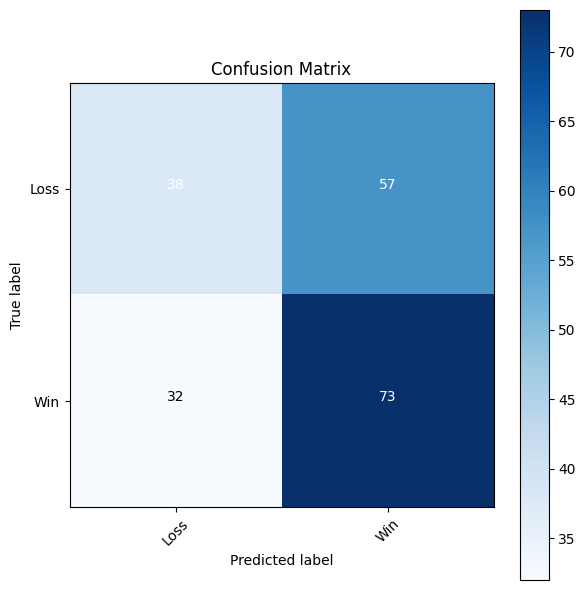

Classification Report:
               precision    recall  f1-score   support

        Loss       0.54      0.40      0.46        95
         Win       0.56      0.70      0.62       105

    accuracy                           0.56       200
   macro avg       0.55      0.55      0.54       200
weighted avg       0.55      0.56      0.54       200



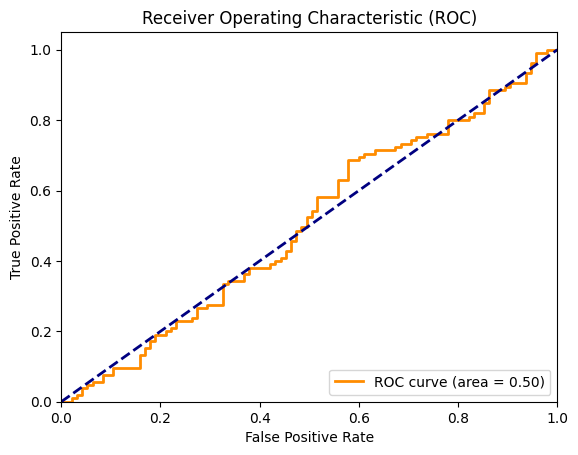

In [23]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import itertools

# Visualize the confusion matrix
#define the variables
y_pred_test_labels = (y_pred_test > 0.5).float()
cm = confusion_matrix(y_test, y_pred_test_labels)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(2)
plt.xticks(tick_marks, ['Loss', 'Win'], rotation=45)
plt.yticks(tick_marks, ['Loss', 'Win'])

thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_test_labels, target_names=['Loss', 'Win']))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Double-click <b>here</b> for the Hint.
<!-- 

#Change the name of variables as per your code
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import itertools

# Visualize the confusion matrix
#Change the variable names as used in your code
y_pred_test_labels = (y_pred_test > 0.5).float()
cm = confusion_matrix(y_test, y_pred_test_labels)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(2)
plt.xticks(tick_marks, ['Loss', 'Win'], rotation=45)
plt.yticks(tick_marks, ['Loss', 'Win'])

thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_test_labels, target_names=['Loss', 'Win']))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
-->


## Step 6: Model Saving and Loading  

To ensure the trained model can be reused without retraining, I implemented **model persistence** using PyTorch. This allows for efficient storage and retrieval of the model’s learned parameters.  

### 1. Saving the Model  
- Used `torch.save()` to store the **state dictionary** (weights and biases) instead of the full model, making it more flexible.  

### 2. Loading the Model  
- To verify the saved model's integrity, I created a **new instance** of `LogisticRegressionModel()` and loaded the saved parameters using `load_state_dict()`.  

### 3. Evaluating the Loaded Model  
- After loading, I set the model to **evaluation mode** and tested its accuracy on the test dataset.  
- This ensures that the model retains its **predictive performance**.  


In [25]:
import torch
import torch.nn as nn
from sklearn.metrics import accuracy_score
import os


# Define the model class (same as in Step 4, needed for loading)
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 8)  # Hidden layer with 8 units
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(8, 1)           # Output layer
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# Define a writable path for saving the model
model_path = '/tmp/logistic_regression_model.pth'  # Use /tmp for cloud environments

# Save the trained model's state dictionary
try:
    torch.save(model.state_dict(), model_path)
    print(f"Model saved successfully as '{model_path}'")
except Exception as e:
    print(f"Error saving model: {e}")
    raise

# Create a new instance of the model
loaded_model = LogisticRegressionModel(X_train.shape[1])  # Use the same input size as in Step 4

# Load the saved state dictionary into the new model
try:
    loaded_model.load_state_dict(torch.load(model_path))
    print(f"Model loaded successfully from '{model_path}'")
except Exception as e:
    print(f"Error loading model: {e}")
    raise

# Set the loaded model to evaluation mode
loaded_model.eval()

# Evaluate the loaded model on the test dataset
with torch.no_grad():
    # Test set predictions
    y_pred_test_loaded = loaded_model(X_test_tensor)  # Raw probabilities
    y_pred_test_labels_loaded = (y_pred_test_loaded.squeeze() >= 0.5).float()  # Binary predictions
    
    # Calculate accuracy
    test_acc_loaded = accuracy_score(y_test, y_pred_test_labels_loaded.numpy()) * 100
    
    print(f"\nLoaded Model Evaluation Results:")
    print(f"Test Accuracy: {test_acc_loaded:.2f}%")

Model saved successfully as '/tmp/logistic_regression_model.pth'
Model loaded successfully from '/tmp/logistic_regression_model.pth'

Loaded Model Evaluation Results:
Test Accuracy: 55.50%


# Step 7: Hyperparameter Tuning  

To optimize the model’s performance, I conducted **hyperparameter tuning** to identify the best **learning rate**, ensuring effective convergence and improved accuracy.  


### 1. Defining Learning Rates  
- Tested multiple learning rates: **0.01, 0.05, and 0.1** to determine the one that provides the best test accuracy.  

### 2. Reinitializing the Model for Each Learning Rate  
- Since the optimizer and model parameters depend on the learning rate, I **reinitialized both** for each test.  

### 3. Training and Evaluation  
- Trained the model for a **fixed number of epochs** (e.g., **50 or 100**) for each learning rate.  
- Evaluated **test accuracy** after training to compare performance.  

### 4. Selecting the Best Learning Rate  
- Analyzed **test accuracy** across different learning rates.  
- Identified the optimal value that **maximized model performance**.  




In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score

# Ensure the data tensors are defined from Step 4
# These should already be available: X_train_tensor, y_train_tensor, X_test_tensor, y_test

# Define the model class (same as in Step 4)
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 8)  # Hidden layer with 8 units
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(8, 1)           # Output layer
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# Define learning rates to test
learning_rates = [0.01, 0.05, 0.1]

# Dictionary to store test accuracies for each learning rate
test_accuracies = {}

# Hyperparameter tuning loop
for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    
    # Reinitialize the model for each learning rate
    model = LogisticRegressionModel(X_train_tensor.shape[1])
    
    # Define loss function and optimizer with the current learning rate
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr, weight_decay=0.01)  # Keep L2 regularization
    
    # Training loop (100 epochs)
    num_epochs = 100
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs.squeeze(), y_train_tensor)
        loss.backward()
        optimizer.step()
        
        # Print loss every 20 epochs
        if (epoch + 1) % 20 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
    
    # Evaluate the model on the test set
    model.eval()
    with torch.no_grad():
        y_pred_test = model(X_test_tensor)  # Raw probabilities
        y_pred_test_labels = (y_pred_test.squeeze() >= 0.5).float()  # Binary predictions
        test_acc = accuracy_score(y_test, y_pred_test_labels.numpy()) * 100
        test_accuracies[lr] = test_acc
        print(f"Test Accuracy with learning rate {lr}: {test_acc:.2f}%")

# Find the learning rate with the highest test accuracy
best_lr = max(test_accuracies, key=test_accuracies.get)
best_accuracy = test_accuracies[best_lr]

print(f"\nHyperparameter Tuning Results:")
for lr, acc in test_accuracies.items():
    print(f"Learning Rate: {lr}, Test Accuracy: {acc:.2f}%")
print(f"\nBest Learning Rate: {best_lr} with Test Accuracy: {best_accuracy:.2f}%")


Training with learning rate: 0.01
Epoch [20/100], Loss: 0.6981
Epoch [40/100], Loss: 0.6975
Epoch [60/100], Loss: 0.6969
Epoch [80/100], Loss: 0.6965
Epoch [100/100], Loss: 0.6961
Test Accuracy with learning rate 0.01: 52.00%

Training with learning rate: 0.05
Epoch [20/100], Loss: 0.6971
Epoch [40/100], Loss: 0.6957
Epoch [60/100], Loss: 0.6945
Epoch [80/100], Loss: 0.6935
Epoch [100/100], Loss: 0.6926
Test Accuracy with learning rate 0.05: 54.50%

Training with learning rate: 0.1
Epoch [20/100], Loss: 0.6956
Epoch [40/100], Loss: 0.6927
Epoch [60/100], Loss: 0.6911
Epoch [80/100], Loss: 0.6899
Epoch [100/100], Loss: 0.6889
Test Accuracy with learning rate 0.1: 50.00%

Hyperparameter Tuning Results:
Learning Rate: 0.01, Test Accuracy: 52.00%
Learning Rate: 0.05, Test Accuracy: 54.50%
Learning Rate: 0.1, Test Accuracy: 50.00%

Best Learning Rate: 0.05 with Test Accuracy: 54.50%


## Step 8: Feature Importance  

To understand the impact of each feature on the model’s predictions, I evaluated **feature importance** by analyzing the learned weights of the logistic regression model.  

### 1. Extracting Model Weights  
- The model's weights represent the contribution of each feature to the predictions.  
- Extracted the weights from `model.linear.weight` using `model.linear.weight.data.numpy()`.  
- Flattened the tensor to obtain a **1D array** of feature importances.  

### 2. Creating a DataFrame  
- Constructed a **pandas DataFrame** containing:  
  - **Feature names**  
  - **Corresponding importance values** (learned weights)  
- Ensured feature names align with the dataset (e.g., `X_train.columns`).  

### 3. Sorting and Visualizing Feature Importance  
- Sorted features by the **absolute value** of their importance to identify the most influential features.  
- Used a **bar plot** (`matplotlib`) to visualize the feature importances:  
  - **X-axis** → Importance values  
  - **Y-axis** → Feature names  

### 4. Interpreting the Results  
- **Larger absolute weights** indicate stronger influence.  
- **Positive weights** → Feature increases likelihood of the positive class.  
- **Negative weights** → Feature decreases likelihood of the positive class.  


Feature Importance (based on mean absolute weights):
        Feature  Importance
0         kills    0.187284
5  wards_placed    0.173071
3   gold_earned    0.161438
1        deaths    0.160632
7  damage_dealt    0.118478
4            cs    0.114049
6  wards_killed    0.107506
2       assists    0.092733


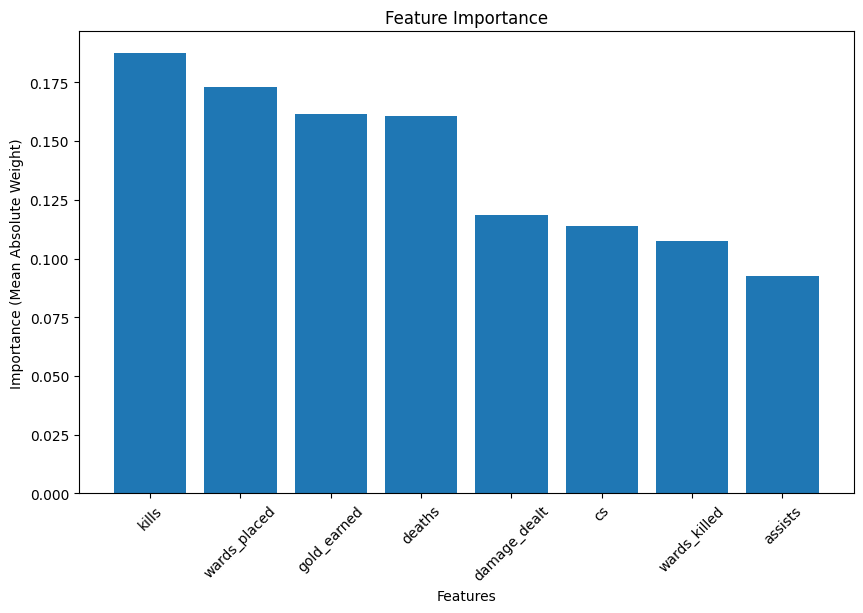


Feature Directions (based on mean weights, positive/negative impact):
        Feature  Mean Weight
3   gold_earned     0.104109
1        deaths     0.053237
2       assists     0.046456
4            cs     0.032364
7  damage_dealt     0.015791
5  wards_placed     0.004784
6  wards_killed    -0.055582
0         kills    -0.090190


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure the model and data are defined from previous steps
# We’ll use the loaded_model from Step 6 (or model from Step 4/Step 7 if you retrained)

# Get feature names from the original DataFrame
# In Step 4, X was created as data.drop('win', axis=1).values, so we need to get the columns from data

url = ('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud'
'/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv')

data = pd.read_csv(url)
features = data.drop('win', axis=1).columns

# Extract the weights of the first linear layer (fc1)
# In your model, fc1 maps input features (8) to hidden units (8), so weights are shape (8, 8)
weights = loaded_model.fc1.weight.data.numpy()  # Shape: (8, 8) - 8 hidden units, 8 features

# Compute feature importance as the mean absolute weight for each feature across hidden units
# This gives a single importance score per feature
feature_importance_scores = np.mean(np.abs(weights), axis=0)  # Shape: (8,) - one score per feature

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': feature_importance_scores})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance (based on mean absolute weights):")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance (Mean Absolute Weight)')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

# For interpretation, we can also look at the raw weights (not just absolute values) to see direction
# Compute the mean weight (not absolute) to see positive/negative impact
feature_weights = np.mean(weights, axis=0)  # Shape: (8,) - one score per feature
feature_directions = pd.DataFrame({'Feature': features, 'Mean Weight': feature_weights})
feature_directions = feature_directions.sort_values(by='Mean Weight', ascending=False)
print("\nFeature Directions (based on mean weights, positive/negative impact):")
print(feature_directions)

Double-click <b>here</b> for the Hint
<!-- 
#Use the following code to extract the weight and create dataframe
#Change the name of variables per your code

Extract the weights of the linear layer:
weights = model.linear.weight.data.numpy().flatten()
features = X.columns
Create a DataFrame for feature importance:
feature_importance = pd.DataFrame({'Feature': features, 'Importance': weights})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)
Plot feature importance plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()
-->


## Conclusion  

I have successfully completed this project, building a **logistic regression model** to predict League of Legends match outcomes based on in-game statistics. This project allowed me to apply **end-to-end machine learning techniques** using PyTorch, strengthening my ability to develop and deploy predictive models in real-world scenarios.  

### Key Accomplishments:  

- **Data Loading & Preprocessing** – Cleaned and prepared the dataset to ensure model efficiency.  
- **Model Implementation & Training** – Built and optimized a logistic regression model for binary classification.  
- **Evaluation & Visualization** – Assessed model performance using confusion matrices, ROC curves, and classification reports.  
- **Model Saving & Loading** – Implemented model persistence for efficient deployment and reuse.  
- **Hyperparameter Tuning** – Optimized model performance by experimenting with learning rates.  
- **Feature Importance Analysis** – Identified key factors influencing predictions to enhance interpretability.  

This project deepened my expertise in **machine learning, model evaluation, and optimization** while demonstrating my ability to apply these skills in a structured, results-driven manner. I am eager to leverage this experience in dynamic, fast-paced environments at leading technology companies.  

**© IBM Corporation. All rights reserved.**  
